In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\aravi\Desktop\Data Pre-processing\titanic_dataset.csv") # Loading the dataset.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df1= df.set_index("PassengerId")
df1.head() # Making ‘PassengerId’ as the index column

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.info() # checking the basic info regaring the dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df1.describe() # checking the basic stats of the dataset.

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df1.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

1.Age,Cabin and Embarked are having missing values.
2.The dataset contains object , float and int datatypes. Also we have the Sex column which is categorical and we need to convert this .

In [10]:
df1["Age"].fillna(df1["Age"].mean() , inplace = True)

In [11]:
df1["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df1["Embarked"].fillna(df1["Embarked"].mode() , inplace = True) #For Embarked we can fill the missing values with mode.

In [13]:
df1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
df1.drop("Cabin" , axis =1 , inplace =True)

In [15]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
df1["Sex"].replace("male" ,0 , inplace = True)
df1["Sex"].replace("female" ,1 ,inplace = True) # Converting categorical values in the column "Sex" as male = 0 , female = 1.

In [17]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


{'whiskers': [<matplotlib.lines.Line2D at 0x185558ebe20>,
 'caps': [<matplotlib.lines.Line2D at 0x18555fa44c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x185558eb9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x18555fa4be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18555fa4f70>],
 'means': []}

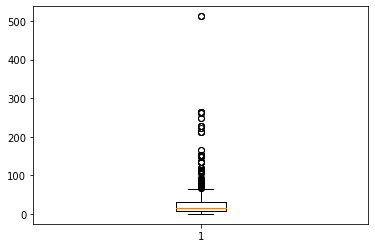

In [18]:
plt.boxplot(df1["Fare"]) # drawing a boxplot to find outliers. 

In [19]:
Q1 = np.percentile(df1["Fare"] ,25 , interpolation = "midpoint")
Q2 = np.percentile(df1["Fare"] , 50 , interpolation ="midpoint")
Q3 = np.percentile(df1["Fare"] ,75 , interpolation ="midpoint")

#find IQR

IQR = Q3-Q1
print("IQR is " , IQR)

#find upper and lower limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3+1.5*IQR

outlier = []

for x in df1["Fare"]:
  if ((x > upper_limit) or (x < lower_limit)):
    outlier.append(x)
print("outlier are " , outlier)

IQR is  23.0896
outlier are  [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [20]:
index_outlier = df1["Fare"] > upper_limit
ind_out = df1.loc[index_outlier].index # All outliers are above the upper limit.

In [21]:
df1.drop(ind_out , inplace = True) # Dropping the outliers from the data.

{'whiskers': [<matplotlib.lines.Line2D at 0x18556094b50>,
 'caps': [<matplotlib.lines.Line2D at 0x185560a02b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x185560947f0>],
 'medians': [<matplotlib.lines.Line2D at 0x185560a08b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x185560a0c40>],
 'means': []}

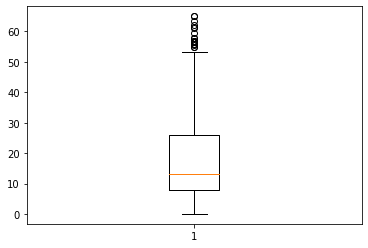

In [22]:
plt.boxplot(df1["Fare"])

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Name      775 non-null    object 
 3   Sex       775 non-null    int64  
 4   Age       775 non-null    float64
 5   SibSp     775 non-null    int64  
 6   Parch     775 non-null    int64  
 7   Ticket    775 non-null    object 
 8   Fare      775 non-null    float64
 9   Embarked  775 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 66.6+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x185561103d0>,
 'caps': [<matplotlib.lines.Line2D at 0x18556110af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18556110040>],
 'medians': [<matplotlib.lines.Line2D at 0x1855611c250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1855611c5e0>],
 'means': []}

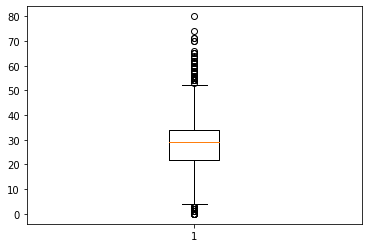

In [24]:
plt.boxplot(df1["Age"].astype(int)) # To check for any outliers in Age column

In [25]:
#There are some outliers and we need to deal with thise outliers.

Q1 = np.percentile(df1["Age"] ,25 , interpolation = "midpoint")
Q2 = np.percentile(df1["Age"] , 50 , interpolation ="midpoint")
Q3 = np.percentile(df1["Age"] ,75 , interpolation ="midpoint")

#finding IQR

IQR = Q3-Q1
print("IQR is " , IQR)

#finding upper and lower limit

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3+1.5*IQR

outlier = []

for x in df1["Age"]:
  if ((x > upper_limit) or (x < lower_limit)):
    outlier.append(x)
print("outlier are " , outlier)

IQR is  12.0
outlier are  [54.0, 2.0, 58.0, 55.0, 2.0, 66.0, 3.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 3.0, 2.0, 59.0, 54.0, 62.0, 3.0, 65.0, 54.0, 61.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 54.0, 2.0, 64.0, 62.0, 62.0, 53.0, 54.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 70.0, 60.0, 60.0, 0.67, 57.0, 54.0, 1.0, 0.42, 2.0, 1.0, 0.83, 74.0]


In [26]:
index_outlier = df1["Age"] < lower_limit
df1.drop(df1.loc[index_outlier].index , inplace = True) #Finiding the index of outliers less than lower limit and dropping.

{'whiskers': [<matplotlib.lines.Line2D at 0x18556189520>,
 'caps': [<matplotlib.lines.Line2D at 0x18556189c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x18556189190>],
 'medians': [<matplotlib.lines.Line2D at 0x185561933a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18556193730>],
 'means': []}

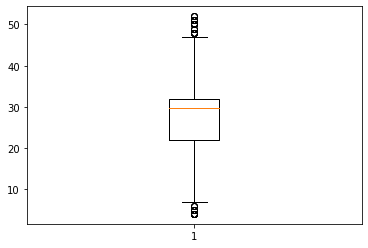

In [27]:
index_outlier2 = df1["Age"] > upper_limit
df1.drop(df1.loc[index_outlier2].index , inplace = True)
plt.boxplot(df1["Age"])

In [28]:
df1["Parch"].value_counts()

0    573
1     77
2     45
5      5
3      4
4      3
6      1
Name: Parch, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x185561e4fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x185561f1730>,
 'boxes': [<matplotlib.lines.Line2D at 0x185561e4c40>],
 'medians': [<matplotlib.lines.Line2D at 0x185561f1e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x185561fd220>],
 'means': []}

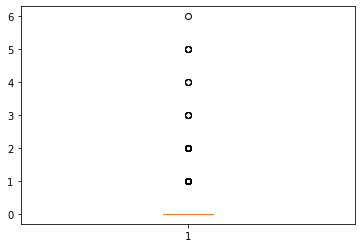

In [29]:
plt.boxplot(df["Parch"])

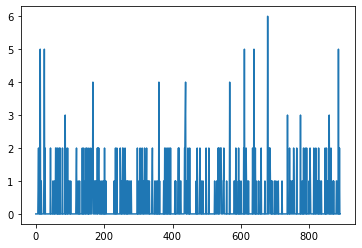

In [30]:
plt.plot(df["Parch"])

since there are no extreme values,can ignore the outliers.

In [31]:
from sklearn import preprocessing

In [32]:
df2 = df1.copy(deep =True)

In [33]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q


In [34]:
df2.drop(["Name" , "Ticket"] , axis =1 , inplace = True)

In [35]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,S
3,1,3,1,26.000000,0,0,7.9250,S
4,1,1,1,35.000000,1,0,53.1000,S
5,0,3,0,35.000000,0,0,8.0500,S
6,0,3,0,29.699118,0,0,8.4583,Q


In [36]:
dummies = pd.get_dummies(df2["Embarked"] , prefix ="Embarked")
df2 = df2.drop("Embarked" , axis =1 )
df2 = pd.concat([df2 , dummies] , axis =1 )

In [37]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,0,0,1
3,1,3,1,26.000000,0,0,7.9250,0,0,1
4,1,1,1,35.000000,1,0,53.1000,0,0,1
5,0,3,0,35.000000,0,0,8.0500,0,0,1
6,0,3,0,29.699118,0,0,8.4583,0,1,0


In [39]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()

X = df2.drop("Survived" , axis =1)
y = df2["Survived"]

In [40]:
X = min_max.fit_transform(X)
X = pd.DataFrame(X)
y = min_max.fit_transform([y])
y = pd.DataFrame(y)

In [41]:
y = y.stack()

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y ,test_size=1/3 , random_state = 44)

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
my_model = model.fit(xtrain,ytrain)
prediction = my_model.predict(xtest)

In [45]:
from sklearn.metrics import mean_squared_error

print("MSE is " ,mean_squared_error(ytest, prediction))

MSE is  0.0
